In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -uq "/content/drive/My Drive/plants_classifier.zip" 

In [ ]:
!unzip -d "/content/drive/My Drive/plants_classifier.zip"

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, RMSprop

import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
path_to_zip = tf.keras.utils.get_file('plants_classifier.zip',origin="https://drive.google.com/drive/search?q=plants_classifier.zip",extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'plants_classifier')

In [ ]:
PATH = os.path.join('/content/plants_classifier/')

In [ ]:
PATH

'/content/plants_classifier/'

In [ ]:
train_dir = os.path.join(PATH, 'train')

In [ ]:
train_cabbage_dir = os.path.join(train_dir, '0')
train_chilli_dir = os.path.join(train_dir, '1')
train_coconut_dir = os.path.join(train_dir, '2')
train_cotton_dir = os.path.join(train_dir, '3')
train_mango_dir = os.path.join(train_dir, '4')
train_pumpkin_dir = os.path.join(train_dir, '5')
train_sugarcane_dir = os.path.join(train_dir, '6')
train_sunflower_dir = os.path.join(train_dir, '7')
train_tea_dir = os.path.join(train_dir, '8')
train_wheat_dir=os.path.join(train_dir, '9')

In [ ]:
train_cabbage_dir = len(os.listdir(train_cabbage_dir))
train_chilli_dir = len(os.listdir(train_chilli_dir))
train_coconut_dir = len(os.listdir(train_coconut_dir))
train_cotton_dir = len(os.listdir(train_cotton_dir))
train_mango_dir = len(os.listdir(train_mango_dir))
train_pumpkin_dir = len(os.listdir(train_pumpkin_dir))
train_sugarcane_dir = len(os.listdir(train_sugarcane_dir))
train_sunflower_dir = len(os.listdir(train_sunflower_dir))
train_tea_dir = len(os.listdir(train_tea_dir))
train_wheat_dir = len(os.listdir(train_wheat_dir))

total_train = train_cabbage_dir+train_chilli_dir+train_coconut_dir+train_cotton_dir+train_mango_dir+train_pumpkin_dir+train_sugarcane_dir+train_sunflower_dir+train_tea_dir+train_wheat_dir


In [ ]:
print(train_cabbage_dir)
print(train_chilli_dir)
print(train_coconut_dir)
print(train_cotton_dir)
print(train_mango_dir)
print(train_pumpkin_dir)
print(train_sugarcane_dir)
print(train_sunflower_dir)
print(train_tea_dir)
print(train_wheat_dir)
print(total_train)



50
50
50
50
50
50
50
50
50
50
500


In [ ]:
batch_size = 10
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 998 images belonging to 20 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1,3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

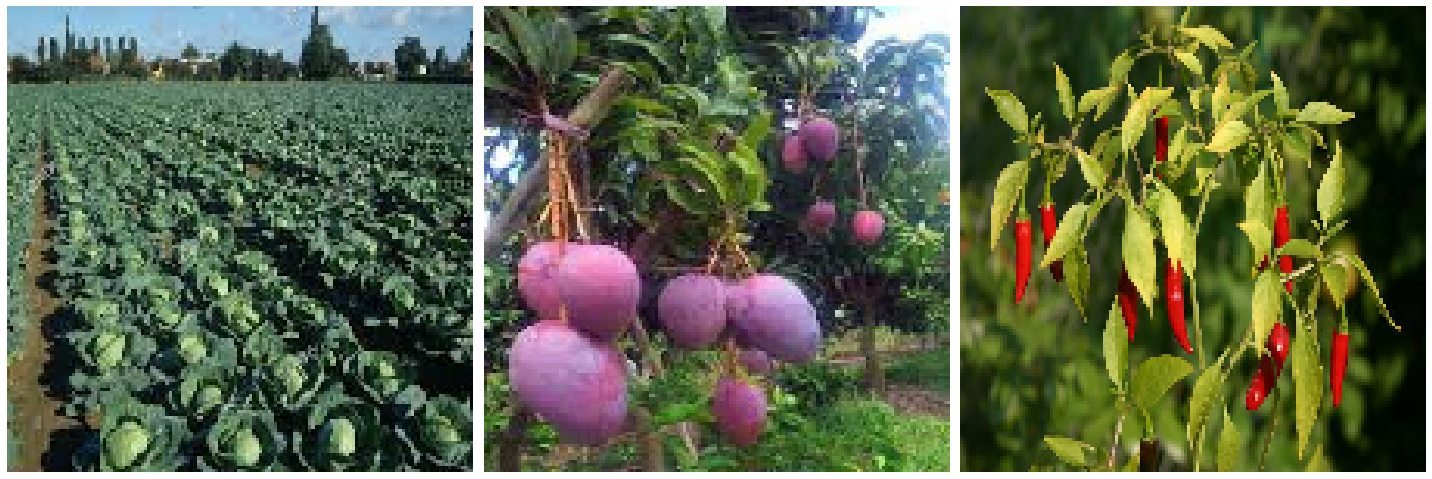

In [ ]:
plotImages(sample_training_images[:3])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 20736)           

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    #validation_data=val_data_gen,
    #validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/10
 1/50 [..............................] - ETA: 35s

InvalidArgumentError: ignored

In [ ]:
!wget "https://drive.google.com/drive/search?q=image.jpg"

--2020-01-05 08:04:48--  https://drive.google.com/drive/search?q=image.jpg
Resolving drive.google.com (drive.google.com)... 173.194.217.113, 173.194.217.102, 173.194.217.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/search?q%3Dimage.jpg&followup=https://drive.google.com/drive/search?q%3Dimage.jpg [following]
--2020-01-05 08:04:48--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/search?q%3Dimage.jpg&followup=https://drive.google.com/drive/search?q%3Dimage.jpg
Resolving accounts.google.com (accounts.google.com)... 172.217.204.84, 2607:f8b0:400c:c13::54
Connecting to accounts.google.com (accounts.google.com)|172.217.204.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [tex

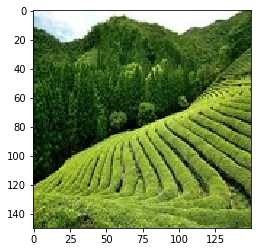

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/image.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

# model.save("model.h5")
# model()

In [ ]:
img_cvt.shape
cv2.imwrite("/content/drive/My Drive/pump.jpg",img_cvt)

True

In [ ]:
# import numpy as np

# def my_func(arg):
#   arg = tf.convert_to_tensor(arg, dtype=tf.float32)
#   return tf.matmul(arg, arg) + arg
# # !cp model.h5 /drive/ml/

In [ ]:
# tf.convert_to_tensor(img_cvt, dtype=tf.int64)



In [ ]:
# from tensorflow.contrib import lite
# converter = lite.TFLiteConverter.from_keras_model_file('model.h5')
# tfmodel = converter.convert()
# open("model.tflite","wb").write(tfmodel)
#code to convert into tflite

In [ ]:
f = img_cvt[None,:,:,:]

In [ ]:
f.shape

(1, 150, 150, 3)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 20736)            

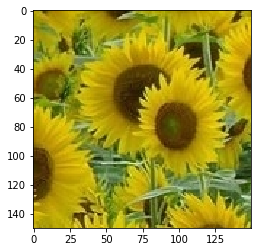

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_cvt)

PREDICTION

In [ ]:
model.predict(f)

array([[1.]], dtype=float32)

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# height = 150
# width = 150
# dim = (width, height)
# # res_img = []
# res = cv2.resize(img_cvt, dim, interpolation=cv2.INTER_AREA)
# # for i in range(len(img)):
# #   res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
# #   res_img.append(res)

In [ ]:
# from PIL import Image
# import numpy as np
# from skimage import transform
# def load(filename):
#   np_image = Image.open(filename)
#   np_image = np.array(np_image).astype('float32')/255
#   # np_image = transform.resize(np_image, (256, 256, 3))
#   np_image = np.reshape(image,(150,150,3))
#   np_image = np.expand_dims(np_image, axis=0)
#   return np_image

# image = load('/content/drive/My Drive/kkk.jpg')
# # model.predict(image)

In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(img_cvt)